In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
media = pd.read_csv('mediacompany.csv')
media = media.drop('Unnamed: 7', axis=1)

In [3]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
media['Date'] = pd.to_datetime(media['Date'])

In [5]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [6]:
from datetime import datetime
D0 = datetime(2017,2,28)
D1 = media.Date
delta =  D1-D0
media['Day'] = delta

In [7]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [8]:
media['Day'] = media['Day'].astype(str)
media['Day'] = media['Day'].map(lambda x : x[0:2])
media['Day'] = media['Day'].astype(int)

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


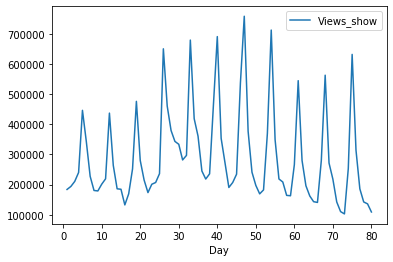

In [10]:
media.plot.line(x = 'Day', y = 'Views_show')

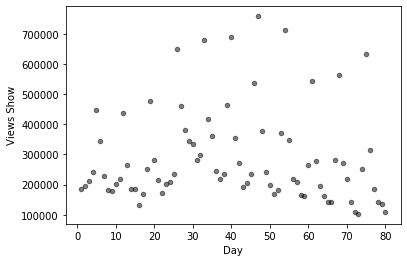

In [11]:

plt.scatter(media.Day, media.Views_show, s=20, color = (0,0,0), alpha=0.5)
plt.xlabel('Day')
plt.ylabel('Views Show')
plt.show()

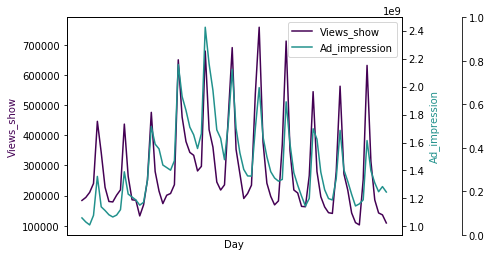

In [12]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('Views_show')
par1.set_ylabel('Ad_impression')

colors1 = plt.cm.viridis(0)
colors2 = plt.cm.viridis(0.5)
colors3 = plt.cm.viridis(.9)

p1, = host.plot(media.Day, media.Views_show, color = colors1, label='Views_show')
p2, = par1.plot(media.Day, media.Ad_impression, color = colors2, label = 'Ad_impression')

lns = [p1,p2]
host.legend(handles=lns, loc='best')

#right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

#no x-ticks
par2.xaxis.set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

In [13]:
media['weekday']= (media['Day']+3)%7
media.weekday.replace(0,7,inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [14]:
X = media[['Visitors','weekday']]
Y = media['Views_show']

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
import statsmodels.api as sm
X = sm.add_constant(X)

lr_1 = sm.OLS(Y,X).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 07 May 2020   Prob (F-statistic):           8.01e-12
Time:                        15:27:31   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [25]:
def cond(i):
    if i % 7 == 4: return 1
    elif i % 7 == 5: return 1
    else: return 0
    return i
media['weekend'] = [cond(i) for i in media['Day']]

In [26]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [27]:
X = media[['Visitors','weekend']]
Y = media['Views_show']

In [30]:
X = sm.add_constant(X)
lr_2 = sm.OLS(Y,X).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 07 May 2020   Prob (F-statistic):           2.51e-12
Time:                        15:54:02   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [33]:
X = media[['Visitors','weekend','Character_A']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_3 = sm.OLS(Y,X).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.53e-14
Time:                        16:05:14   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [36]:
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961, 0, inplace=True)

In [37]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [38]:
X = media[['Visitors','weekend','Character_A','Lag_Views']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_4 = sm.OLS(Y,X).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 07 May 2020   Prob (F-statistic):           3.16e-21
Time:                        16:52:14   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

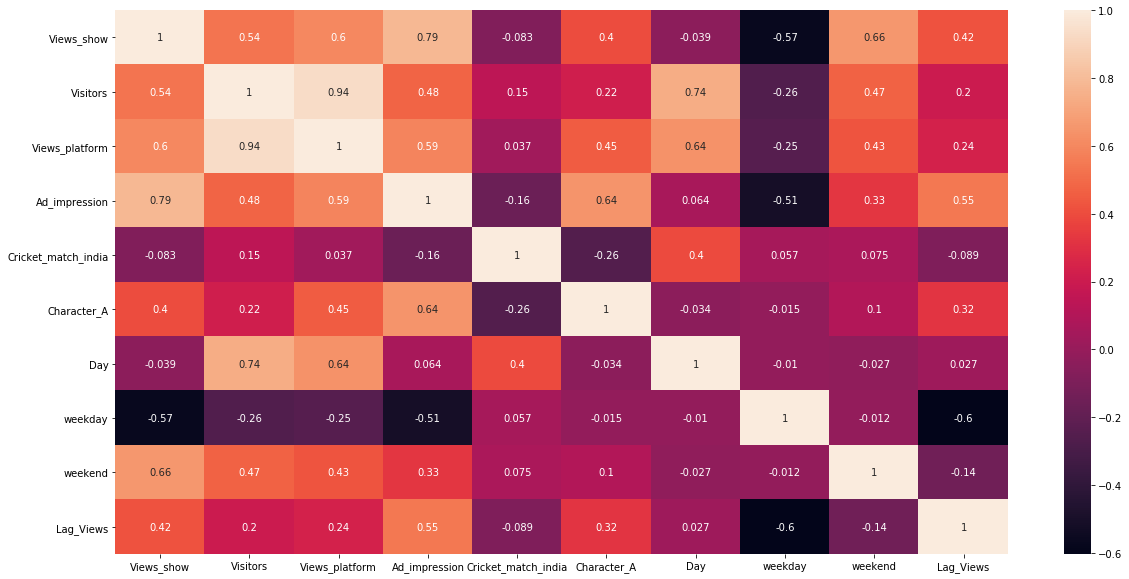

In [39]:
plt.figure(figsize = (20,10))
sns.heatmap(media.corr(), annot = True)

In [41]:
X = media[['weekend','Character_A','Views_platform']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_5 = sm.OLS(Y,X).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 07 May 2020   Prob (F-statistic):           3.59e-15
Time:                        17:02:48   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [44]:
X = media[['weekend','Character_A','Visitors','Ad_impression']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_6 = sm.OLS(Y,X).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.10e-25
Time:                        17:09:27   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [45]:
X = media[['weekend','Character_A','Ad_impression']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_7 = sm.OLS(Y,X).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.05e-26
Time:                        17:12:28   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [46]:
media['Ad_impression_million'] = media['Ad_impression']/1000000

In [49]:
X = media[['weekend','Character_A','Ad_impression_million','Cricket_match_india']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_8= sm.OLS(Y,X).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.02e-25
Time:                        17:18:05   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [52]:
X = media[['weekend','Character_A','Ad_impression']]
Y = media['Views_show']
X = sm.add_constant(X)
lr_9 = sm.OLS(Y,X).fit()

predict_vieds = lr_9.predict(X)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show,predict_vieds)
r_square = r2_score(media.Views_show, predict_vieds)

print('MSE: {}'.format(mse))
print('R Square: {}'.format(r_square))

MSE: 4677651616.253471
R Square: 0.8026434468575623


Text(0.5, 0.98, 'Actual vs Predicted Result')

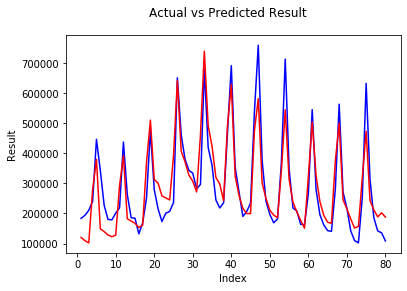

In [62]:
index = [i for i in range(1, 81,1)]
plt.figure()
plt.plot(index,media.Views_show, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(index,predict_vieds, color='red', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Result')
plt.suptitle('Actual vs Predicted Result')

In [ ]:
index = [i for i in range(1, 81,1)]
plt.figure()
plt.plot(index,media.Views_show-predict_vieds, color='blue', linewidth = 1.5, linestyle='-')
plt.plot(index,predict_vieds, color='red', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Result')
plt.suptitle('Actual vs Predicted Result')